# Seattle Car Accident Severity Prediction Model

## Applied Data Science Capstone Project

### ----------------------------------------------

### 1. Introduction

#### 1.1 Background

Seattle is a major city in the North West of the USA with headquarters of some major companies of the world like Microsoft, Boeing, Amazon, Costco, etc. The city also serves as a transit hub for people travelers and tourists moving to and from Canada. The city boasts a high concentration of technology workers, with median income more than most of the metro cities in the US. The city's real estate and housing stats are very high as well. With a population of three quarters of a million and the area of 217 Sq km, a higher standard of services is expected by the patrons of the city. The city does its best to improve services, especially by employing AI/ML based solutions. One such opportunity is the emergency management system to address traffic accidents. This project throws some light on to solving one problem, namely, trying to predict the severity of the accident as soon as an accident is reported to the city's emergency management system.

#### 1.2 Problem

The city of Seattle emergency management system (911) would like to deploy a new model to predict the severity of a newly reported accident based on the information received. The city currently has the 911 service which generates the data by receiving a 911 call, which results in dispatching the police and ambulance to the accident site. The city would like have a predictive model to predict the severity of the accident. Based on the severity of the accident, the city administration wants manage its resources like emergency personnel, the traffic management and the trauma centers in the city.

#### 1.3 Interest

Obviously, by saving lives and streamlining the city administration the city will not only save money on its operations, but with improved services, the rating of the city will improve, thereby attracting more businesses and families into the city.


### 2. Data Acquisition and Cleaning

#### 2.1 Data Source

Seattle Department of Transportation (SDOT) compiles all collisions provided by the Seattle Police Department and recorded by traffic records. This compiled data is reported on their website as a csv file for the general public to consume. This data is refreshed every week with the latest records. The dataset include data from 2004.

#### 2.2 Data Cleaning

Even though SDOT reported data has all types of SEVERITY codes (0,1,2,2b,3), the sample dataset provided on the course website has only two codes, 1(property damage) and 2(injury) only. Variables like SERIOUSINJURIES and FATALITIES that are reported in the metadata file are not reported in the actual data. Some other observation:

    1. EXCEPTRSNCODE is a matadata
    2. SEVERITYCODE is a duplicate column
    3. There are two collision codes, 1) State Code and 2) SDOT code. One is redundant
    4. Descriptions attributes are redundant. Metadata has detailed information.
    5. Location variable is redundant in light of X and Y.
    6. OBJECTID, INCKEY, COLDETKEY, and REPORTNO are index columns and cannot be used as attributes.
The shape of the dataset: 194673, 38, whereas the first row is the column names.
Severity Codes in the dataset:

    1. 1-prop damage
    2. 2-injury
Due to the presence of null values and the redundant variables as mentioned above, the data has to be preprocessed before going further.


In [145]:
import pandas as pd
import matplotlib.pylab as plt

fn = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
headers = ["SEVERITYCODE", "X", "Y", "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "STATUS", "ADDRTYPE", "INTKEY", 
           "LOCATION", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "SEVERITYCODE0", "SEVERITYDESC", "COLLISIONTYPE", "PERSONCOUNT", 
           "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INCDATE", "INCDTTM", "JUNCTIONTYPE", "SDOT_COLCODE", "SDOT_COLDESC", 
           "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SDOTCOLNUM", "SPEEDING", 
           "ST_COLCODE", "ST_COLDESC", "SEGLANEKEY", "CROSSWALKKEY", "HITPARKEDCAR"]
df = pd.read_csv(fn, skiprows = 1,header = None, names=headers)
df.head()

C:\Users\a_pup\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [146]:
df_standby = df
df.shape

(194673, 38)

In [147]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [148]:
df['SEVERITYCODE'].replace({1:0, 2:1}, inplace=True)

In [149]:
df['SEVERITYCODE'].value_counts()

0    136485
1     58188
Name: SEVERITYCODE, dtype: int64

In [150]:
df.drop(['OBJECTID', 'INCKEY', 'INTKEY', 'COLDETKEY', 'REPORTNO','LOCATION', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
         'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC', 'ST_COLCODE'], axis=1, inplace=True)

In [151]:
df.shape

(194673, 25)

In [152]:
df.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,EXCEPTRSNCODE,SEVERITYCODE0,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.323148,47.703140,Matched,Intersection,,2,Angles,2,0,...,NaN,N,Overcast,Wet,Daylight,NaN,NaN,0,0,N
1,0,-122.347294,47.647172,Matched,Block,NaN,1,Sideswipe,2,0,...,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,0,N
2,0,-122.334540,47.607871,Matched,Block,NaN,1,Parked Car,4,0,...,NaN,0,Overcast,Dry,Daylight,NaN,NaN,0,0,N
3,0,-122.334803,47.604803,Matched,Block,,1,Other,3,0,...,NaN,N,Clear,Dry,Daylight,NaN,NaN,0,0,N
4,1,-122.306426,47.545739,Matched,Intersection,NaN,2,Angles,2,0,...,NaN,0,Raining,Wet,Daylight,NaN,NaN,0,0,N


In [153]:
df = df[df.EXCEPTRSNCODE != 'NEI']
df.shape

(189035, 25)

In [154]:
df = df[df.STATUS != 'Unmatched']
df.shape

(184920, 25)

### 3.Exploratory Data Analysis

#### 3.1 Dumming the Target Variable

The target variable is a binary classification variable with values 1 and 2, where 1 represents property damage and 2 is injury. Since it's a binary variable, the obvious choice is the have a binary classification model. In order to achieve that, the target variable should be converted into a dummy variable, where 0 represents a non-event and 1 represents an event, where an event is an injury. The model will try to predict the occurrence of an injury due to the accident reported.

#### 3.2 Binning and re-classifying the variables

Many of the variables are redundant variables as discussed in the Data section. After eliminating those, the final set of variables are as follows: 
    1. ADDRTYPE
    2. COLLISIONTYPE
    3. PERSONCOUNT
    4. PEDCOUNT
    5. PEDCYLCOUNT
    6. VEHCOUNT
    7. JUNCTIONTYPE
    8. SDOT_COLCODE
    9. INATTENTIONIND
    10. UNDERINFL
    11. WEATHER
    12. ROADCOND
    13. LIGHTCOND
    14. PEDROWNOTGRNT
    15. SPEEDING
    16. HITPARKEDCAR
    
After collapsing the categories based on the Information Value statistic, the final binnings are as follows:

    1. COLLISIONTYPE:
        NaN : Other
        Angles, Left Turn : Angles/Left Turn
        Cycles, Pedestrian : Cycles/Pedestrian
        Head On, Rear Ended : Head On/Rear Ended
        Parked Car : Parked Car
        Right Turn : Right Turn
        Sideswipe : Sideswipe
        
    2. PERSONCOUNT
        <=2 : 2
        3 to 5 : 3 to 5
        >=6 : 6+
        
    3. PEDCOUNT
        0 : 0
        >0 : 1+
        
    4. PEDCYLCOUNT
        0 : 0
        >0 : 1+ 
        
    5. VEHCOUNT
        <=1 : 1
        2 : 2
        >=3 : 3+
        
    6. JUNCTIONTYPE
        NaN, Ramp Junction: Unknown
        At Intersection (but not related to intersection) : At Intersection (but not related to intersection)
        At Intersection (intersection related) : At Intersection (intersection related)
        Driveway Junction : Driveway Junction
        Mid-Block (but intersection related) : Mid-Block (but intersection related)
        Mid-Block (not related to intersection) : Mid-Block (not related to intersection)
        
    7. SDOT_COLCODE
        11 : 11
        14 : 14
        16 : 16
        14 : 14
        0, 13 : 1300
        26,28 : 2628
        all other: 99
        
    8. INATTENTIONIND
        Y : Y
        NaN : N
        
    9. ROADCOND
        NaN, Unknown, Standing Water, Oil, Sand/Mud/Dirt : Other
        Ice, Snow/Slush : Ice/Snow/Slush
        Dry, Wet : Dry/Wet
        
    10. LIGHTCOND
        NaN, Unknown : Other
        Dark - Street Lights On : Dark - Street Lights On
        Dark-No Lights/Off/Other : Dark-No Lights/Off/Other
        Dawn, Desk : Dawn/Desk
        Daylight : Daylight

    11. WEATHER
        Clear : Clear
        Fog/Smog/Smoke : Fog/Smog/Smoke
        Overcast : Overcast
        Raining : Raining
        Snowing : Snowing
        NaN, Other : Snowing
        
    12. PEDROWNOTGRNT
        NaN : N
        Y : Y
        
    13. SPEEDING
        NaN : N
        Y : Y
        
#### 3.3 Changing categorical variables into continuous variables

To fit the logistic regression model the features are converted into continuous variables using weight of evidence of the SEVERITYCODE on each of the variable and their classifications. This is the basis of the weights for each of the category. The final category is as follows: Note: only the variables and their final binning is shown here.

    COLLISIONTYPE : 
        Angles/Left Turn : 23
        Cycles/Pedestrian : 49
        Head On/Rear Ended : 25
        Other : 17
        Parked Car : 0
        Right Turn : 14
        Sideswipe : 9

    PERSONCOUNT : 
        2 : 0
        3 to 6 : 7
        6+ : 12

    PEDCOUNT : 
        0 : 0
        1+ : 31

    PEDCYLCOUNT : 
        0 : 0
        1+ : 29

    VEHCOUNT : 
        1 : 13
        2 : 0
        3+ : 8

    SDOT_COLCODE : 
        11 : 22
        14 : 24
        16 : 5
        24 : 53
        99 : 33
        1300 : 0
        2628 : 20
        


In [155]:
import numpy as np
cols = ["ADDRTYPE", "COLLISIONTYPE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "JUNCTIONTYPE", "SDOT_COLCODE", "INATTENTIONIND", "UNDERINFL", 
"WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR"]

for c in cols:
    print("the columns is: ", c)
    print(df[c].value_counts(dropna=False))
    print("**********************")
    print("")

the columns is:  ADDRTYPE
Block           121089
Intersection     63083
Alley              745
NaN                  3
Name: ADDRTYPE, dtype: int64
**********************

the columns is:  COLLISIONTYPE
Parked Car    44766
Angles        34521
Rear Ended    33611
Other         23350
Sideswipe     18278
Left Turn     13635
Pedestrian     6481
Cycles         5332
Right Turn     2921
Head On        2007
NaN              18
Name: COLLISIONTYPE, dtype: int64
**********************

the columns is:  PERSONCOUNT
2     107304
3      34880
4      14369
1      11524
5       6553
0       5359
6       2695
7       1125
8        532
9        214
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57        

In [156]:
# Data Transformation

df['ADDRTYPE'].replace(np.NaN, 'Block', inplace=True)

df['COLLISIONTYPE'].replace({np.NaN: 'Other', 'Angles':'Angles/Left Turn', 'Left Turn':'Angles/Left Turn',
                             'Cycles':'Cycles/Pedestrian', 'Pedestrian':'Cycles/Pedestrian', 
                             'Head On':'Head On/Rear Ended', 'Rear Ended':'Head On/Rear Ended'}, inplace=True)

df['PERSONCOUNT'] = np.where((df.PERSONCOUNT >5),6,df.PERSONCOUNT)
df['PERSONCOUNT'] = np.where((df.PERSONCOUNT ==3),3,df.PERSONCOUNT)
df['PERSONCOUNT'] = np.where((df.PERSONCOUNT ==4),3,df.PERSONCOUNT)
df['PERSONCOUNT'] = np.where((df.PERSONCOUNT ==5),3,df.PERSONCOUNT)
df['PERSONCOUNT'] = np.where((df.PERSONCOUNT <3),2,df.PERSONCOUNT)

df['PEDCOUNT'] = np.where((df.PEDCOUNT >0),1,df.PEDCOUNT)

df['PEDCYLCOUNT'] = np.where((df.PEDCYLCOUNT >0),1,df.PEDCYLCOUNT)

df['VEHCOUNT'] = np.where((df.VEHCOUNT >2),3,df.VEHCOUNT)
df['VEHCOUNT'] = np.where((df.VEHCOUNT <2),1,df.VEHCOUNT)

df['JUNCTIONTYPE'].replace({np.NaN:'Unknown', 'Ramp Junction':'Unknown'}, inplace=True)

df['SDOT_COLCODE'].replace({18:99, 15:99, 12:99, 51:99, 29:99, 21:99, 56:99, 27:99, 54:99, 23:99, 48:99, 
                            31:99, 25:99, 34:99, 64:99, 69:99, 33:99, 55:99, 66:99, 22:99, 32:99, 53:99, 
                            44:99, 61:99, 35:99, 58:99, 68:99, 36:99, 46:99, 52:99, 47:99, 13:1300, 0:1300,
                           26:2628, 28:2628}, inplace=True)

df['INATTENTIONIND'].replace(np.NaN, 'N', inplace=True)

df['WEATHER'].replace({np.NaN:'Other', 'Unknown':'Other', 'Sleet/Hail/Freezing Rain':'Other', 'Blowing Sand/Dirt':'Other', 
                       'Severe Crosswind':'Other', 'Partly Cloudy':'Other'}, inplace=True)

df['ROADCOND'].replace({np.NaN:'Other', 'Unknown':'Other', 'Standing Water':'Other', 'Sand/Mud/Dirt':'Other', 'Oil':'Other',
                       'Ice':'Ice/Snow/Slush', 'Snow/Slush':'Ice/Snow/Slush', 'Dry':'Dry/Wet', 'Wet':'Dry/Wet'}, 
                       inplace=True)

df['LIGHTCOND'].replace({np.NaN:'Other', 'Unknown':'Other', 'Dark - No Street Lights':'Dark-No Lights/Off/Other', 
                         'Dark - Street Lights Off':'Dark-No Lights/Off/Other', 
                         'Dark - Unknown Lighting':'Dark-No Lights/Off/Other',
                        'Dusk':'Dawn/Desk', 'Dawn':'Dawn/Desk'}, inplace=True)

df['PEDROWNOTGRNT'].replace(np.NaN, 'N', inplace=True)

df['SPEEDING'].replace(np.NaN, 'N', inplace=True)

for c in cols:
    print("the columns is: ", c)
    print(df[c].value_counts(dropna=False))
    print("**********************")
    print("")

the columns is:  ADDRTYPE
Block           121092
Intersection     63083
Alley              745
Name: ADDRTYPE, dtype: int64
**********************

the columns is:  COLLISIONTYPE
Angles/Left Turn      48156
Parked Car            44766
Head On/Rear Ended    35618
Other                 23368
Sideswipe             18278
Cycles/Pedestrian     11813
Right Turn             2921
Name: COLLISIONTYPE, dtype: int64
**********************

the columns is:  PERSONCOUNT
2    124187
3     55802
6      4931
Name: PERSONCOUNT, dtype: int64
**********************

the columns is:  PEDCOUNT
0    178110
1      6810
Name: PEDCOUNT, dtype: int64
**********************

the columns is:  PEDCYLCOUNT
0    179523
1      5397
Name: PEDCYLCOUNT, dtype: int64
**********************

the columns is:  VEHCOUNT
2    143285
1     25532
3     16103
Name: VEHCOUNT, dtype: int64
**********************

the columns is:  JUNCTIONTYPE
Mid-Block (not related to intersection)              85537
At Intersection (intersection 

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import dexplot as dxp

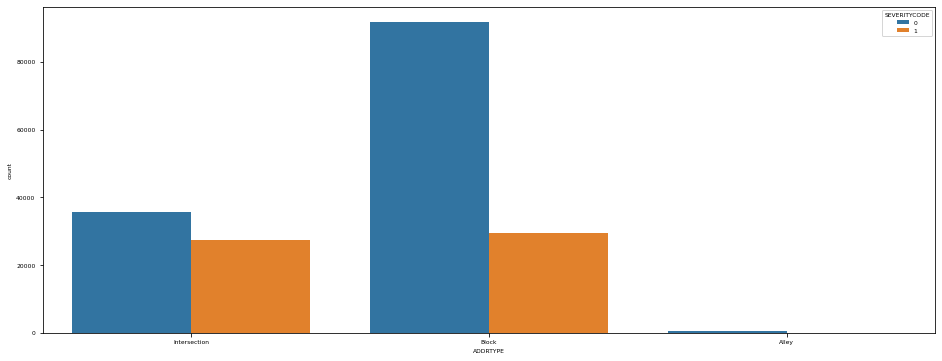

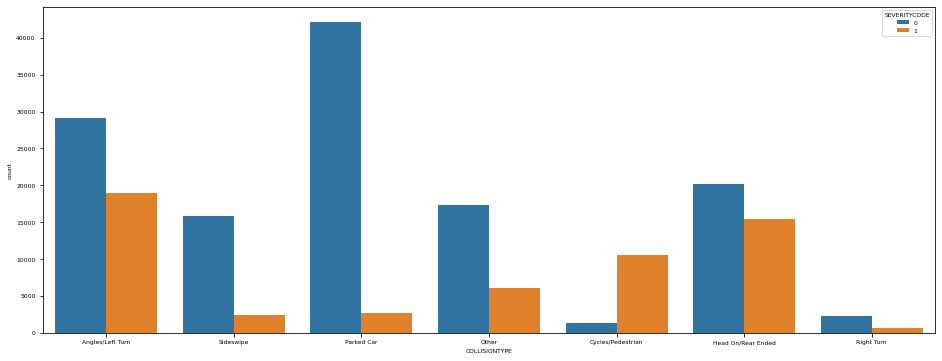

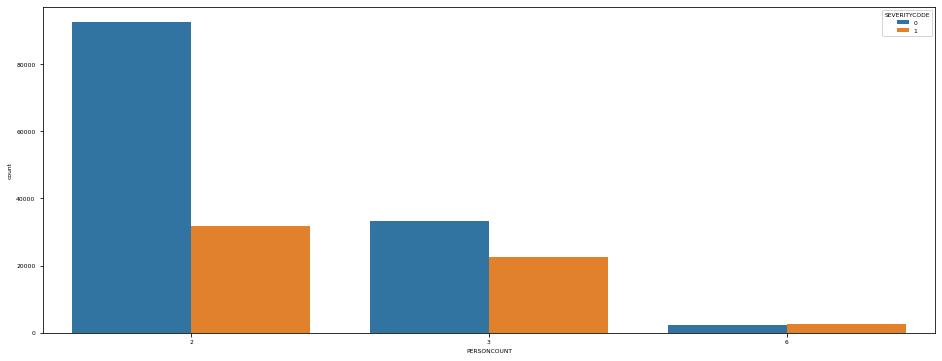

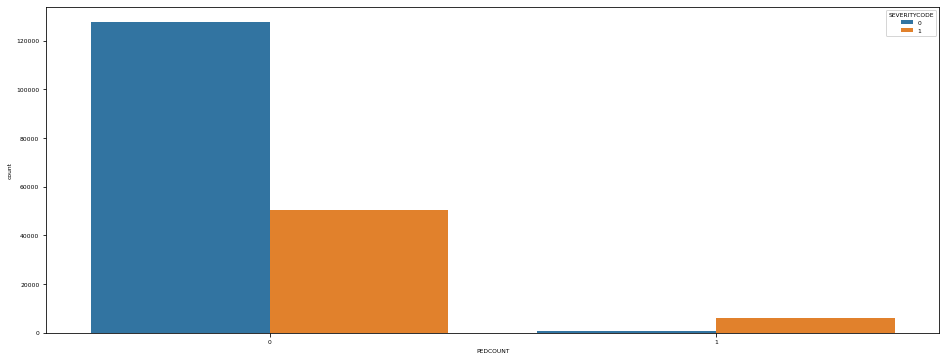

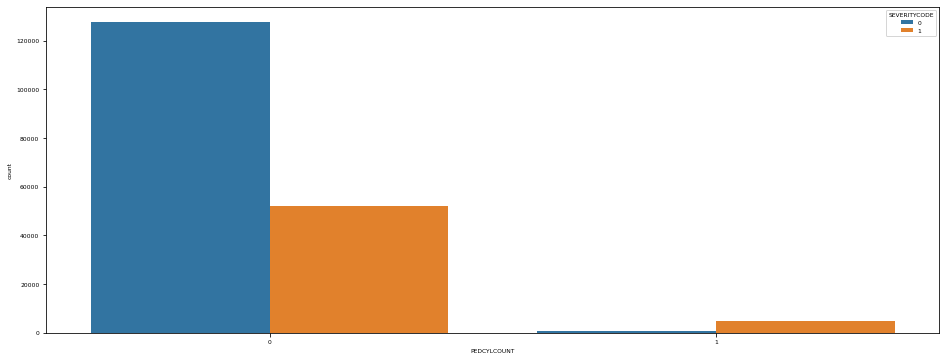

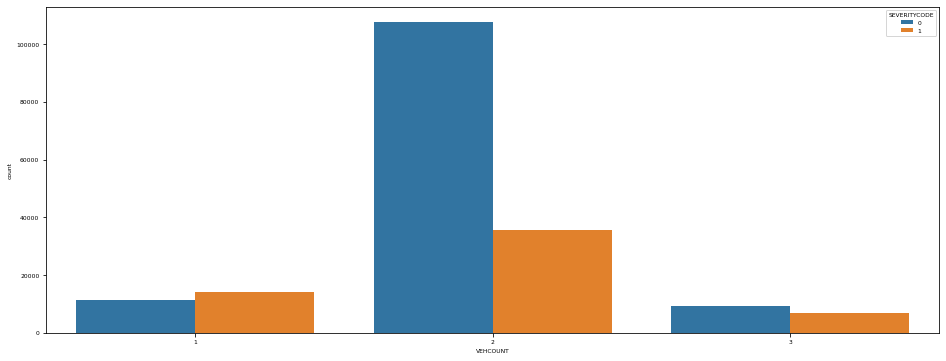

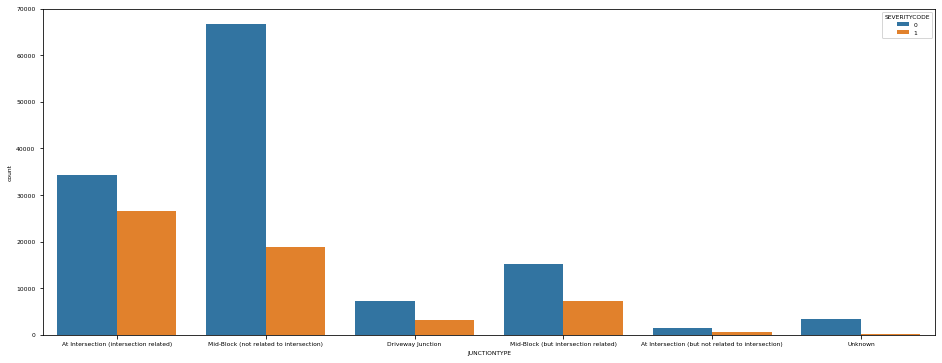

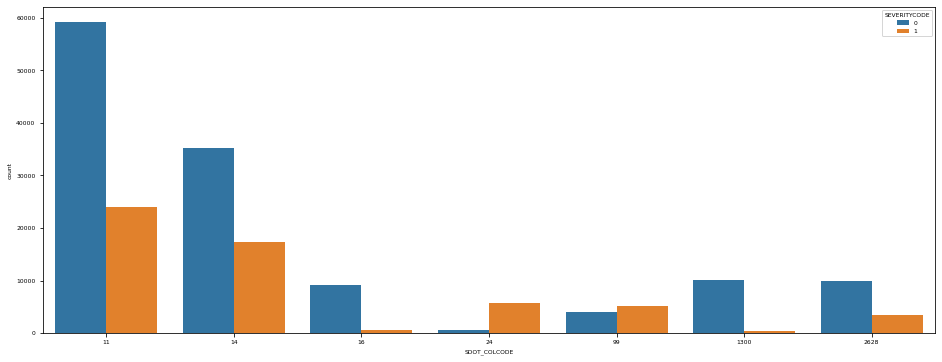

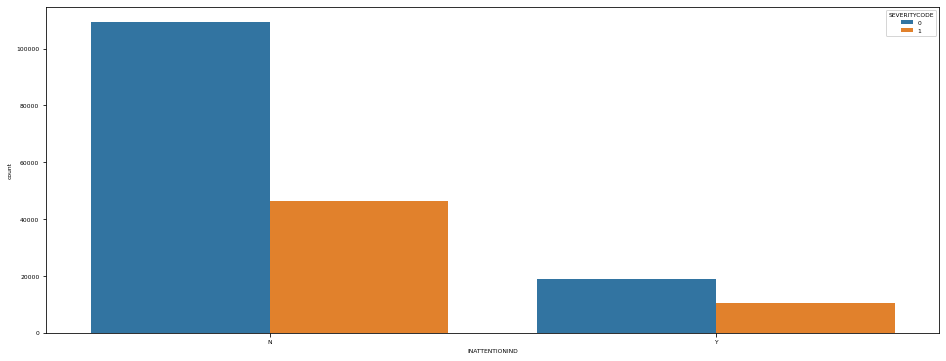

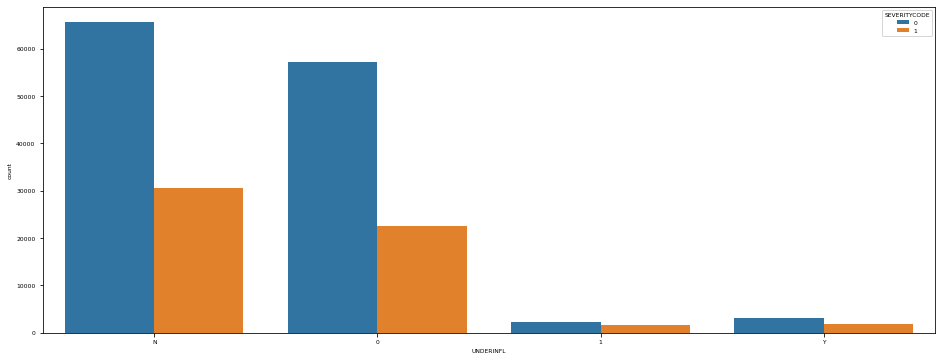

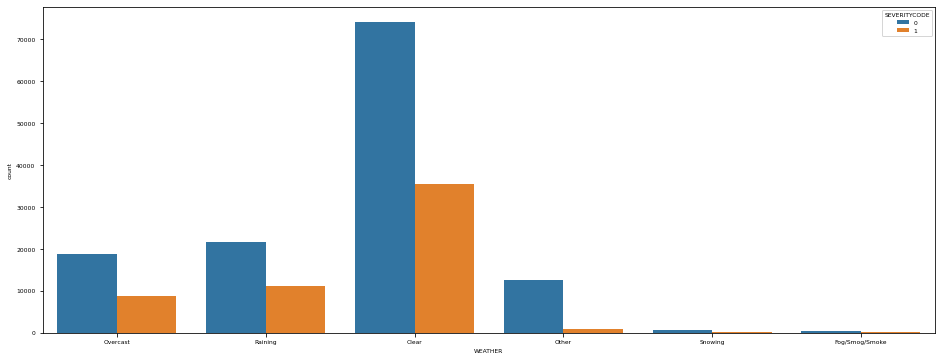

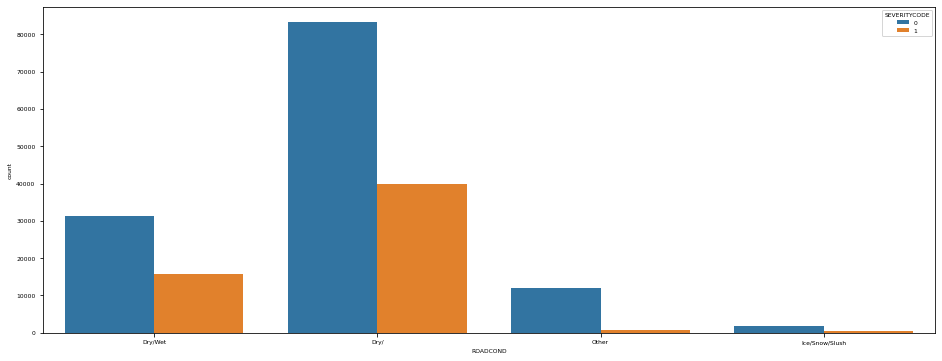

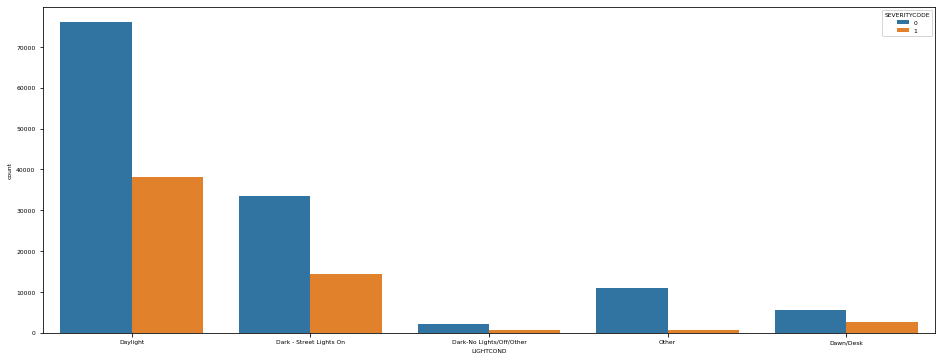

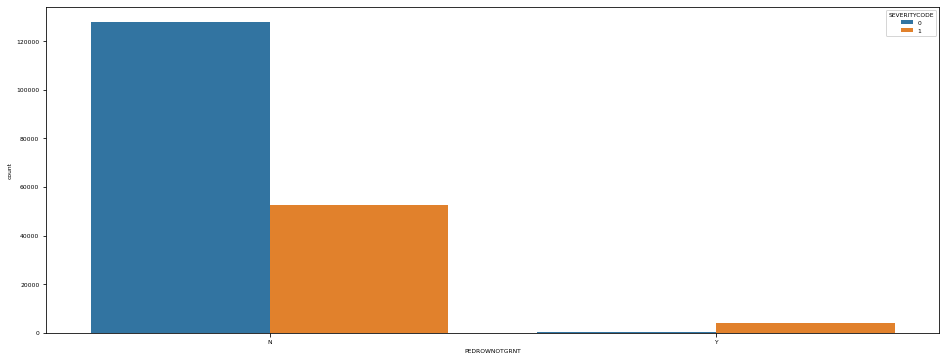

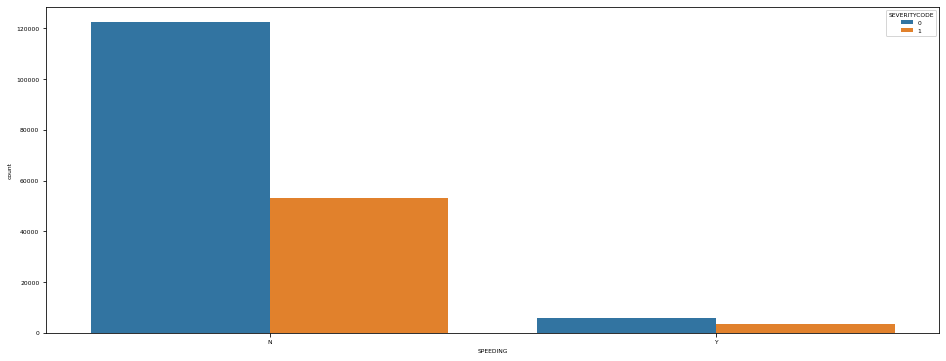

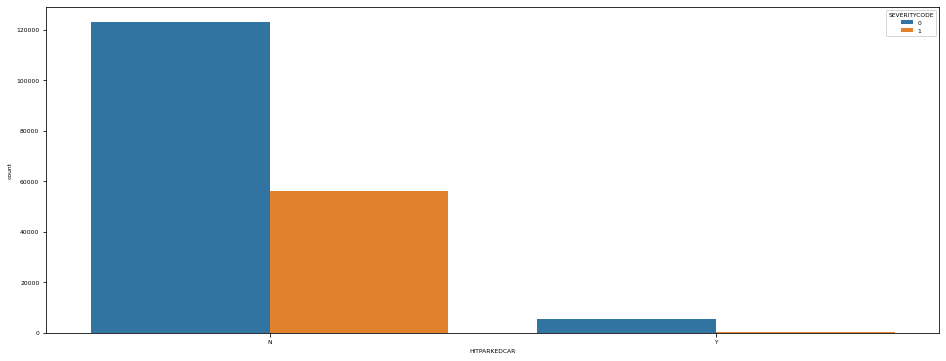

In [158]:
for c in cols:
    plt.figure(figsize=(16, 6))
    sns.countplot(c, hue='SEVERITYCODE', data=df)




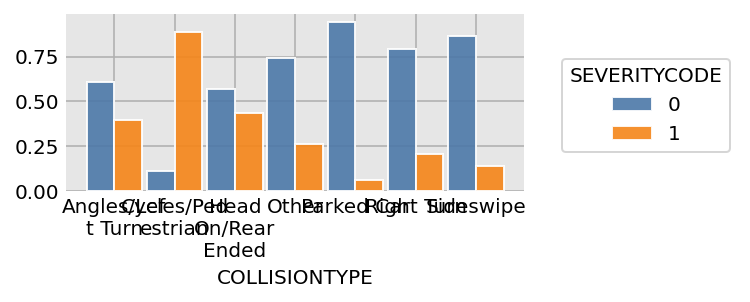

<Figure size 720x432 with 0 Axes>

In [231]:
plt.figure(figsize=(10, 6))
dxp.count('COLLISIONTYPE', data=df, split='SEVERITYCODE', normalize='COLLISIONTYPE')

In [160]:
for c in cols:
    print('Variable *********** : ', c)
    print(df.groupby([c, 'SEVERITYCODE']).size())
    print('***********************************************')
    print('')

Variable *********** :  ADDRTYPE
ADDRTYPE      SEVERITYCODE
Alley         0                 664
              1                  81
Block         0               91736
              1               29356
Intersection  0               35810
              1               27273
dtype: int64
***********************************************

Variable *********** :  COLLISIONTYPE
COLLISIONTYPE       SEVERITYCODE
Angles/Left Turn    0               29162
                    1               18994
Cycles/Pedestrian   0                1300
                    1               10513
Head On/Rear Ended  0               20210
                    1               15408
Other               0               17301
                    1                6067
Parked Car          0               42123
                    1                2643
Right Turn          0                2316
                    1                 605
Sideswipe           0               15798
                    1                2480
dty

### 4. Model Development

Since the target variable is a binary variable, the model employed is Logistic Regression. Logistic regression is widely employed by data scientists and researchers. Some of the added advantages include easy to implement, and interpret. 

Logistic regression uses a sigmoid function:

    p = 1/1+e^-y
    
Properties of Logistic Regression:
    
    •	Dependent variable follows Bernoulli Distribution
    •	Estimation is done through maximum likelihood
    •	Model fitness is calculated through Concordance, KS-D static
    
#### 4.1 Building 

Model building in Scikit-learn - Here we are going to predict the severity of the accident using logistic regression classifier. 

#### 4.2 Testing and Training Data

“from sklearn.cross_validation import train_test_split” 
The training data will be used to fit the model, and later the model will tested using the testing data. I used 85-15 split of training and testing data.
    

In [163]:
df_proc = df[['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'PEDROWNOTGRNT']]
df_proc.shape

(184920, 8)

In [164]:
df_proc.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,PEDROWNOTGRNT
0,1,Angles/Left Turn,2,0,0,2,11,N
1,0,Sideswipe,2,0,0,2,16,N
2,0,Parked Car,3,0,0,3,14,N
3,0,Other,3,0,0,3,11,N
4,1,Angles/Left Turn,2,0,0,2,11,N


In [169]:
#Binning variables
#**********************************
df_proc.loc[df_proc['COLLISIONTYPE']=='Angles/Left Turn', 'COLLISIONTYPE_'] = 23
df_proc.loc[df_proc['COLLISIONTYPE']=='Cycles/Pedestrian', 'COLLISIONTYPE_'] = 49
df_proc.loc[df_proc['COLLISIONTYPE']=='Head On/Rear Ended', 'COLLISIONTYPE_'] = 25
df_proc.loc[df_proc['COLLISIONTYPE']=='Other', 'COLLISIONTYPE_'] = 17
df_proc.loc[df_proc['COLLISIONTYPE']=='Parked Car', 'COLLISIONTYPE_'] = 0
df_proc.loc[df_proc['COLLISIONTYPE']=='Right Turn', 'COLLISIONTYPE_'] = 14
df_proc.loc[df_proc['COLLISIONTYPE']=='Sideswipe', 'COLLISIONTYPE_'] = 9
#**********************************
df_proc.loc[df_proc['PERSONCOUNT']==2, 'PERSONCOUNT_'] = 0
df_proc.loc[df_proc['PERSONCOUNT']==3, 'PERSONCOUNT_'] = 7
df_proc.loc[df_proc['PERSONCOUNT']==6, 'PERSONCOUNT_'] = 12
#**********************************
df_proc.loc[df_proc['PEDCOUNT']==0, 'PEDCOUNT_'] = 0
df_proc.loc[df_proc['PEDCOUNT']==1, 'PEDCOUNT_'] = 31
#**********************************
df_proc.loc[df_proc['PEDCYLCOUNT']==0, 'PEDCYLCOUNT_'] = 0
df_proc.loc[df_proc['PEDCYLCOUNT']==1, 'PEDCYLCOUNT_'] = 29
#**********************************
df_proc.loc[df_proc['VEHCOUNT']==1, 'VEHCOUNT_'] = 13
df_proc.loc[df_proc['VEHCOUNT']==2, 'VEHCOUNT_'] = 0
df_proc.loc[df_proc['VEHCOUNT']==3, 'VEHCOUNT_'] = 8
#**********************************
df_proc.loc[df_proc['SDOT_COLCODE']==11, 'SDOT_COLCODE_'] = 22
df_proc.loc[df_proc['SDOT_COLCODE']==14, 'SDOT_COLCODE_'] = 24
df_proc.loc[df_proc['SDOT_COLCODE']==16, 'SDOT_COLCODE_'] = 5
df_proc.loc[df_proc['SDOT_COLCODE']==24, 'SDOT_COLCODE_'] = 53
df_proc.loc[df_proc['SDOT_COLCODE']==99, 'SDOT_COLCODE_'] = 33
df_proc.loc[df_proc['SDOT_COLCODE']==1300, 'SDOT_COLCODE_'] = 0
df_proc.loc[df_proc['SDOT_COLCODE']==2628, 'SDOT_COLCODE_'] = 20
#**********************************
df_proc.loc[df_proc['PEDROWNOTGRNT']=='N', 'PEDROWNOTGRNT_'] = 0
df_proc.loc[df_proc['PEDROWNOTGRNT']=='Y', 'PEDROWNOTGRNT_'] = 31


C:\Users\a_pup\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\a_pup\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [177]:
#df_proc.head()
df_proc.groupby(['PEDROWNOTGRNT_', 'SEVERITYCODE']).size()

PEDROWNOTGRNT_  SEVERITYCODE
0.0             0               127755
                1                52539
31.0            0                  455
                1                 4171
dtype: int64

In [202]:
# Independent variables:-
features = ['COLLISIONTYPE_', 'PERSONCOUNT_', 'PEDCOUNT_', 'PEDCYLCOUNT_', 'VEHCOUNT_', 'SDOT_COLCODE_']
X = df_proc[features]
y = df_proc['SEVERITYCODE']

In [203]:
# Randomly split the data into test and train datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=747)

In [204]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [205]:
y_pred=logreg.predict(X_test)

In [206]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[17525,  1656],
       [ 5331,  3226]], dtype=int64)

In [207]:
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

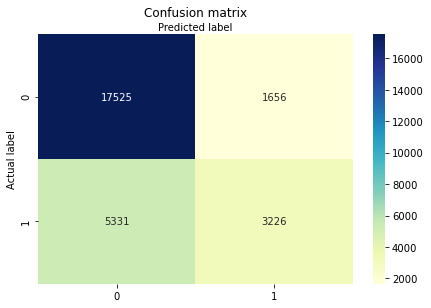

In [208]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [209]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7481072896387627
Precision: 0.6607947562474396
Recall: 0.3770012854972537


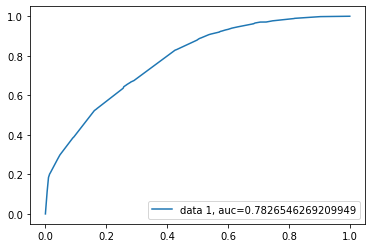

In [210]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [211]:
import statsmodels.api as sm
from scipy import stats

In [214]:
# Conclusion
X2 = sm.add_constant(X)
est = sm.Logit(y, X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.489963
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           SEVERITYCODE   No. Observations:               184920
Model:                          Logit   Df Residuals:                   184913
Method:                           MLE   Df Model:                            6
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:                  0.2051
Time:                        06:29:13   Log-Likelihood:                -90604.
converged:                       True   LL-Null:                   -1.1399e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.4351      0.030   -116.032      0.000      -3.493      -3.377
COLLISIONTYPE_   

### 5. Results

There are three results for this model. They are:
    1. Maximum likelihood and regression values table
    2. Confusion Matrix
    3. ROC curve
    
The Maximum Likelihood converged with function value: .49 The coefficients of all the variables employed are clearly displayed along with their std err and p-values. The Pseudo R-sqe also show the significance of the model.

Confusion Matrix provides Accuracy, Precision and mis-classification of the model. With the accuracy of 74% and precision of 66%, this model can significantly classify the severity.

The ROC curve shows the AUC at 78% which is significantly higher than 50%. 

### 6. Observations and Discussions

#### 6.1 Variables

This modeling exercise has opened up the world of road safety and its challenges to the world. It gave a window of opportunity into the Seattle PD data. There are some straight forward variables, but some intuitive variables happened to be very insignificant. Example: Under Influence is not a significant variable. Also, rush hour accidents are not injurious. 

There are too many variables with missing values, else, the model would perform even better.

#### 6.2 Opportunities

The data can be segmented to create multiple models. 
There is enough data to support that. Also, some of the verbiage from 2004 is little confusing. Example: Driverless in 2020 is an autonomous vehicle without a driver.  

### 7. Conclusion

The deployment of the model is a completely different ball game. The deployment team should be well versed with the nuances and the treatment of the data, else the results will be highly predictive. Also, the model should be calibrated from time to time, and production team should keep track of the incoming data, and the variations in the variables from time to time. With this, I conclude the project. 

Thanks for reading this report!